<a href="https://colab.research.google.com/github/debmalyag/blackboxai-1743245449897/blob/main/indianpopulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load csv file from local machine to google server machine
from google.colab import files
files.upload()

Saving IndiaPopulation.csv to IndiaPopulation.csv


{'IndiaPopulation.csv': b'Year,Population\r1960,449480608\r1961,458533584\r1962,467798203\r1963,477273970\r1964,486961360\r1965,496860732\r1966,506971334\r1967,517292312\r1968,527822725\r1969,538561538\r1970,549507631\r1971,560659799\r1972,572016736\r1973,583577050\r1974,595339266\r1975,607301825\r1976,619463072\r1977,631821268\r1978,644374591\r1979,657121142\r1980,670058951\r1981,683185964\r1982,696500053\r1983,709998008\r1984,723676552\r1985,737532335\r1986,751561939\r1987,765761873\r1988,780128573\r1989,794658392\r1990,809347601\r1991,824192382\r1992,839188834\r1993,854332976\r1994,869620744\r1995,885048007\r1996,900610574\r1997,916304202\r1998,932124592\r1999,948067394\r2000,964128209\r2001,980302570\r2002,996585947\r2003,1012973745\r2004,1029461296\r2005,1046043862\r2006,1062716636\r2007,1079474743\r2008,1096313235\r2009,1113227102\r2010,1130211267\r2011,1147260569\r2012,1164369773\r2013,1181533566\r2014,1198746554\r2015,1216003271\r2016,1233298161\r2017,1250625578\r2018,126797978

In [4]:
#receive data in a dataframe
import pandas as pd
df=pd.read_csv('IndiaPopulation.csv') #DataFrame is used to store table structure data
df #printing all data

,Year,Population
0,1960,449480608
1,1961,458533584
2,1962,467798203
3,1963,477273970
4,1964,486961360
...,...,...
58,2018,1267979780
59,2019,1285354905
60,2020,1302744000
61,2021,1319988000


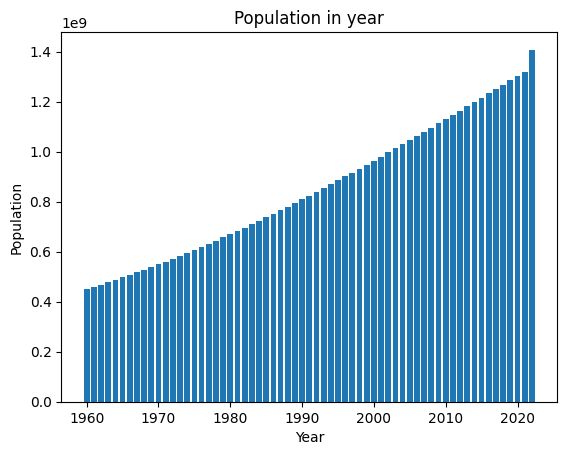

In [6]:
#poltting year and population in bar diagram
import matplotlib.pyplot as plt #for polting data
plt.bar(df['Year'],df['Population']) #1st argument x axis, 2nd argument y axis
plt.xlabel('Year') #label of x  label
plt.ylabel('Population') # label of y axis
plt.title('Population in year') #Title of the datagram
plt.show() #showing the diagram

In [7]:
#spliting traing and testing purpose
from sklearn.model_selection import train_test_split #PREDEFINED FUNCTION USED TO SEPARATE TRAING AND TESTING DATA
xtrain,xtest,ytrain,ytest=train_test_split(df[['Year']],df['Population'],test_size=0.2)

In [8]:
xtrain

,Year
6,1966
22,1982
7,1967
30,1990
51,2011
44,2004
9,1969
54,2014
23,1983
47,2007


In [9]:
xtest

,Year
42,2002
29,1989
61,2021
39,1999
8,1968
36,1996
10,1970
27,1987
12,1972
5,1965


In [10]:
from sklearn.linear_model import LinearRegression #class
model=LinearRegression()#object of linear regression class
model.fit(xtrain,ytrain)

LinearRegression()

In [11]:
model.coef_

array([14672567.31098675])

In [12]:
model.intercept_

np.float64(-28362999950.274982)

In [13]:
ytest

,Population
42,996585947
29,794658392
61,1319988000
39,948067394
8,527822725
36,900610574
10,549507631
27,765761873
12,572016736
5,496860732


In [14]:
ypred=model.predict(xtest)
ypred

array([1.01147981e+09, 8.20736431e+08, 1.29025859e+09, 9.67462104e+08,
       5.12612518e+08, 9.23444402e+08, 5.41957652e+08, 7.91391297e+08,
       5.71302787e+08, 4.68594816e+08, 1.21689575e+09, 5.56630220e+08,
       9.52789537e+08])

In [16]:
import numpy as np

from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)

In [17]:
mae

17799712.589871626

In [18]:
mse

395405851393732.0

In [19]:
rmse

np.float64(19884814.59289304)

In [21]:
model.predict([[2050]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.71576304e+09])

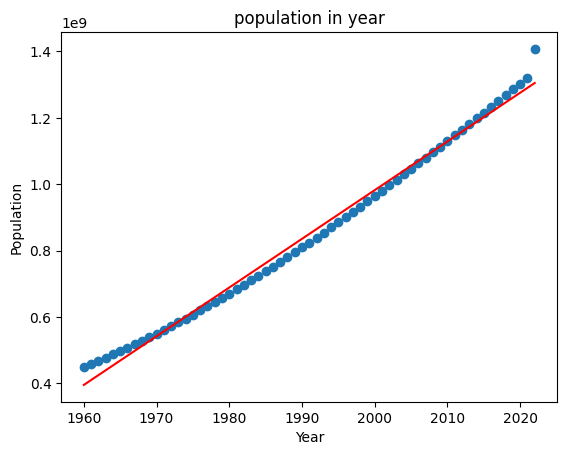

In [22]:
#polt the regression line
plt.scatter(df['Year'],df['Population'])
plt.plot(df['Year'],model.predict(df[['Year']]),color='red')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('population in year')
plt.show()